In [70]:
# Edit this cell to print out your name.
print "My name is %s" % ("ZACHARY MORTON")

My name is ZACHARY MORTON


# Predicting the weather

***For all of the questions in this project, assume that 1 month = 30 days.***

## Problem 1 (20 pts)

Suppose there is a 20% chance it will rain on any given day in a month. What are the odds that that rains on one and only one day in a month. 

Work this problem out a*nalytically* (with pen and paper, using a formula) and write it up in your final document.

Here you should solve the same problem *numerically* using a Monte Carlo approach, similar to how we approached the birthday problem in class. 

Make sure that both approaches give you a similar result. 

In [71]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib notebook

In [86]:
# Your code here
# Use "birthday" problem
from numpy import random


def rain_chance():
    
    number = random.random() #generates random number between 0-1
    
    prob_of_rain = 0
    
    if number >= 0 and number <= .2:  # If the random number is between 0 and .2, then it rains
        prob_of_rain = 1
        
    return prob_of_rain
    

In [87]:
def days_month(): 
    
    ndays_month = 30
    rainy_days = []  # Makes an empty list
    for i in range(0,ndays_month): 
        
        prob_of_rain = rain_chance() # Calls in function from above cell, and uses the 1's and 0's as a value
        rainy_days.append(prob_of_rain)  # adds the value from the above function to the empty list
    total = sum(rainy_days)  # Total of all values in a the list rain_days
    if total == 1:
        return 1
    else:
        return 0  # 1's act as "yes, it does rain" and 0's act as "no, it doesnt rain"

In [88]:
print days_month()

0


In [89]:
num_months = 1000000  # This effectively sets the number of months, similar to setting the number of "rooms" for the birthday
# problem

months_rained = []
for i in range(0,num_months):  # Starts at 0 and goes to 1000000
    
    day_of_rain = days_month()
    months_rained.append(day_of_rain)
total_months_rained= sum(months_rained)
print total_months_rained

9228


In [90]:
odds = total_months_rained/float(num_months)
print odds

0.009228


## Problem 2 (20 pts)

Suppose there is a 10% chance that it will rain on any given day in a month. What are the odds that it rains at least 8 days (in any order) that month?

Work this problem out *numerically* using a Monte Carlo approach. 

In [79]:
# Your code here
# Use "birthday" problem  

# For this part I realized simply changing a couple values in the functions from Problem 1 would work here

def rain_chance2():
    
    number = random.random() #generates random number between 0-1
        
    prob_of_rain = 0  # creates a variable that increases by 1 if number is greater than 0
    # but less than the chance it rains on any given day
    
    if number >= 0 and number <= .1:  # If number is between 0 and .1, then it rains
        prob_of_rain = 1
        
    return prob_of_rain

In [82]:
def days_month2(): # change names and stuff
    
    ndays_month = 30
    rainy_days = []  # Makes an empty list
    for i in range(0,ndays_month): 
        
        prob_of_rain = rain_chance2() 
        rainy_days.append(prob_of_rain)
    total2 = sum(rainy_days)
    if total2 >= 8:  # If it rains 8 or more days, then it returns 1
        return 1
    else:
        return 0

In [83]:
print days_month2()

0


In [84]:
num_months = 1000000

months_rained = []
for i in range(0,num_months):
    
    day_rained = days_month2()
    months_rained.append(day_rained)
total_months_rained2 = sum(months_rained)
print total_months_rained2

7816


In [85]:
odds2 = total_months_rained2/float(num_months)
print odds2

0.007816


## Problem 3 

### 3a (20 pts)

Suppose that if it rains one day, the odds of a certain amount of rainfall *on that day* are

* 1 cm   20%
* 2 cm   30%
* 3 cm   30%
* 4 cm   10%
* 5 cm   10%

However the odds of it raining are dependent on if it rained the day before.

* If it is the first day of the month, there is a 10% chance of rain.
* If it rained 1 day before, but not 2 days before, there is a 20% chance of rain. 
* If it rained both of the 2 days before, but not the 3rd day before, there is a 25% chance of rain.
* If it rained for the 3 days (or more) before, there is a 5% chance of rain. 
* Otherwise, there is a 10% chance of rain

What are the odds that there are at least 10 cm of rain in a given month?

Work this problem out using a Monte Carlo approach. 

In [ ]:
# Your code here


### 3b (10 pts)

Make a histogram of the distribtion of expected rainfall values. You can get this from your Monte Carlo trials. 

Make sure you label everything clearly. 

In [110]:
# Your code here?
x = np.random.normal(5,1,1000)
print len(x)
print x[0:10]

1000
[ 5.41606971  4.62368506  3.31473833  3.22238092  6.43037817  4.14227989
  4.38963202  3.9845303   4.13571227  4.18807506]


<IPython.core.display.Javascript object>


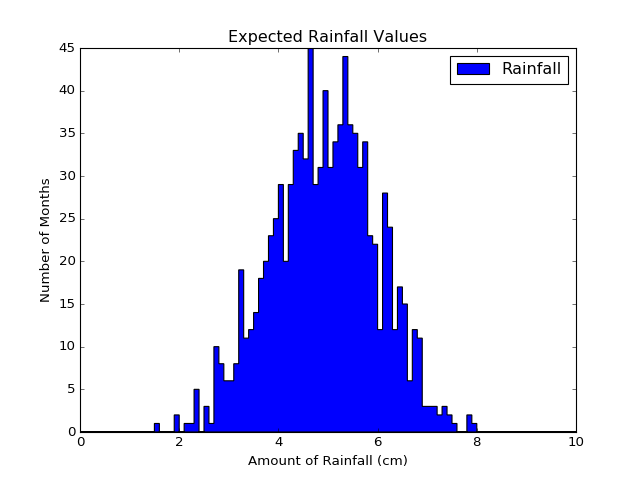

In [113]:
plt.figure() 
plt.hist(x,bins=100,range=(0,10),color='Blue',histtype='stepfilled',label='Rainfall')

plt.xlabel('Amount of Rainfall (cm)',fontsize=12)
plt.ylabel('Number of Months',fontsize=12)

plt.xlim(0,10)

plt.title("Expected Rainfall Values")

plt.legend()

### 3c (10 pts)

What is the average amount of rain to fall in any given month? 



In [103]:
# Your code here?
total_amount = sum(x)
average = total_amount/len(x)
print "The average amount of rainfall in any given month is %fcm" % (average)

The average amount of rainfall in any given month is 4.996148cm


### 3d (20)

Once you find the average value, someone might ask you for the uncertainty (some people also refer to uncertainty as the "*error*") on your prediction. That can be tricky to calculate, so often what is given is just a *range* of possible values. "We estimate the rainfall to be between X cm and Y cm." The question is, how to decide what that range is. 

The way this is often done is to find the middle 95% of the trial values (from your Monte Carlo run) and then use the low-edge and the high-edge of that range. If you're concerned about the middle 95%, then 2.5% of the values are below them and 2.5% of all the values are above them. The rainfall values at those edges are what you use for the ranges to quote. 

This is what people mean when they say, "I'm 95% confident that the rainfall will be between X and Y", and when you write it up for the LaTeX document, you should also quote it this way. 

*Hint!* This part becomes much easier if you sort all the values using any of the numpy/Python sort functions you can read about online. When you sort them, you should be able to find what rainfall is at the edge for the lower 2.5% and the higher 2.5%. 

In [ ]:
# Your code here